#Discrétisation suivie d'un encodage catégoriel
Après la discrétisation, les intervalles de la variable peuvent être traités comme une variable numérique discrète, ou comme des catégories dans une variable catégorielle. Si elle est traitée comme catégorique, nous pouvons suivre la discrétisation en réordonnant les intervalles en fonction de la valeur cible, pour créer une relation monotone entre les intervalles et la cible. Dans cette recette, nous combinerons ces deux techniques d'ingénierie de caractéristiques à l'aide de Feature-engine et de l'ensemble de données Boston House Prices de scikit-learn.

In [1]:
! pip install feature_engine

     |████████████████████████████████| 179 kB 30.5 MB/s 
     |████████████████████████████████| 9.5 MB 35.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
#@title Titre par défaut
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# from feature-engine
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [6]:

# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [8]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [9]:

# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['LSTAT', 'DIS', 'RM'], return_object=True)

disc.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=False, return_object=True,
                          variables=['LSTAT', 'DIS', 'RM'])

In [10]:
# transform train and test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'mean of survived')

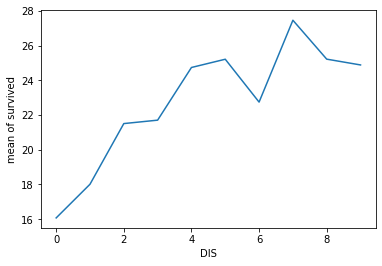

In [11]:
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

In [14]:
# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

OrdinalEncoder(encoding_method='ordered', ignore_format=False, variables=None)

{'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 7, 6: 4, 7: 9, 8: 8, 9: 6},
 'LSTAT': {0: 9, 1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1, 9: 0},
 'RM': {0: 0, 1: 1, 2: 2, 3: 3, 4: 6, 5: 4, 6: 5, 7: 7, 8: 8, 9: 9}}

In [13]:
# we can fnd the list of encoded variables here
enc.variables

In [16]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 7, 6: 4, 7: 9, 8: 8, 9: 6},
 'LSTAT': {0: 9, 1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1, 9: 0},
 'RM': {0: 0, 1: 1, 2: 2, 3: 3, 4: 6, 5: 4, 6: 5, 7: 7, 8: 8, 9: 9}}

In [17]:

# let's transformt the data sets
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

Text(0, 0.5, 'mean of survived')

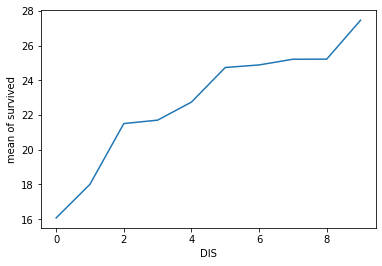

In [19]:
# let's explore the monotonic relationship between bins and target

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')